In [1]:
import numpy as np
import pandas as pd
from keras.datasets import mnist

2025-03-01 22:41:43.678459: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [17]:
import flowkit as fk

In [21]:
!pwd

/Users/soli/Desktop/uni/thesis/code/notebooks


In [29]:
from pathlib import Path

In [30]:
script_dir = Path.cwd()


In [31]:
file_path = script_dir.parent / "data" / "flow18_annotated.fcs"

In [32]:
# we need to add scripts folder to path (this is important code!)
import sys

script_dir = Path.cwd().parent / "scripts"
sys.path.append(str(script_dir))

In [58]:
from datasets import load_flow18
from datasets import load_mnist

## trying to load macosko dataset

In [ ]:
import gzip
import pickle

with gzip.open("/Users/soli/Desktop/uni/thesis/code/data/macosko_2015.pkl.gz", "rb") as f:
    data = pickle.load(f)

x = data["pca_50"]
y = data["CellType1"] #.astype(str)


In [19]:
from sklearn.preprocessing import LabelEncoder

# Example: Convert string labels into numbers
label_encoder = LabelEncoder()
y_numeric = label_encoder.fit_transform(data["CellType1"])

In [3]:
print("Data set contains %d samples with %d features" % x.shape)

Data set contains 44808 samples with 50 features


In [5]:
from openTSNE import TSNE
tsne = TSNE(
    perplexity=30,
    metric="euclidean",
    n_jobs=8,
    random_state=42,
    verbose=True,
)

In [17]:
embedding_train = tsne.fit(x)

--------------------------------------------------------------------------------
TSNE(early_exaggeration=12, n_jobs=8, random_state=42, verbose=True)
--------------------------------------------------------------------------------
===> Finding 90 nearest neighbors using Annoy approximate search using euclidean distance...


   --> Time elapsed: 25.61 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 2.72 seconds
===> Calculating PCA-based initialization...
   --> Time elapsed: 0.09 seconds
===> Running optimization with exaggeration=12.00, lr=3734.00 for 250 iterations...
Iteration   50, KL divergence 5.5020, 50 iterations in 5.2539 sec
Iteration  100, KL divergence 5.4119, 50 iterations in 5.0828 sec
Iteration  150, KL divergence 5.3741, 50 iterations in 4.9139 sec
Iteration  200, KL divergence 5.3615, 50 iterations in 5.2450 sec
Iteration  250, KL divergence 5.3538, 50 iterations in 5.0294 sec
   --> Time elapsed: 25.53 seconds
===> Running optimization with exaggeration=1.00, lr=44808.00 for 500 iterations...
Iteration   50, KL divergence 3.3260, 50 iterations in 5.4165 sec
Iteration  100, KL divergence 3.0994, 50 iterations in 7.1547 sec
Iteration  150, KL divergence 2.9930, 50 iterations in 13.1549 sec
Iteration  200, KL divergence 2.9269, 50 iterations in 14.1513 sec
Iteration  250, K

In [10]:
import matplotlib.pyplot as plt

In [33]:
from styles import set_plot_style

In [44]:
def set_plot_style():
    plt.rcParams.update({
        "font.size": 10,         # Base font size
        "axes.titlesize": 12,    # Title size
        "axes.labelsize": 11,    # Label size
        "xtick.labelsize": 9,    # Tick labels
        "ytick.labelsize": 9,
        "legend.fontsize": 10,   # Legend font size
        "figure.figsize": (5.3, 4),  # Default figure size (adjustable height)
        "savefig.dpi": 300,      # High-quality figures
        "axes.grid": False,       # Enable grid
        "axes.linewidth": 0.5,     # Axis border thickness
        "xtick.major.size": 2,   # Major tick size
        "ytick.major.size": 2,
        "xtick.major.width": 0.4, # Tick width
        "ytick.major.width": 0.4,
        "lines.linewidth": 1.5,   # Line thickness
        "lines.markersize": 5     # Marker size
    })


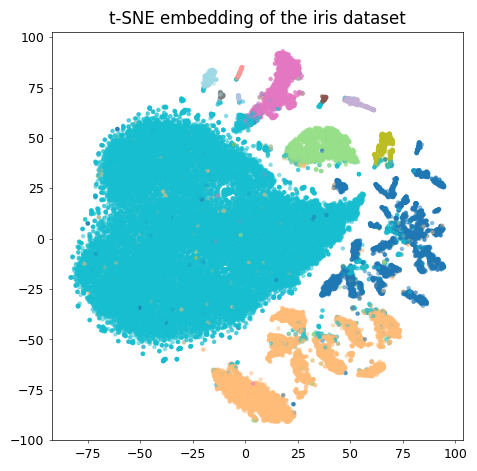

In [45]:
# visualize embedding after early exaggeration 
set_plot_style()
fig = plt.figure(figsize=(5.3, 5.3))
ax = fig.add_subplot(1, 1, 1, title='t-SNE embedding of the iris dataset')
# Create the scatter
ax.scatter(
    x=embedding_train[:,0], 
    y=embedding_train[:,1], 
    c=y_numeric, 
    cmap=plt.colormaps.get_cmap('tab20'), 
    alpha=0.4, 
    s=5
    )
plt.show()